### OBJETIVO DEL DATA PROJECT 3:

**Detección de Enfermedad Cardíaca**

---


Este proyecto de datos tiene como objetivo la detección de enfermedad cardiaca mediante el análisis de un conjunto de datos que contiene información sobre múltiples pacientes con diferentes grados de enfermedad o ausencia de la misma.

Contamos con dos datasets para realizar nuestro análisis, uno que se va a utilizar para entrenar el modelo y validarlo (df_train), otro para poder hacer el test (de_test)y poder subirlo a kaggle con las predicciones.

# Descripción del Dataset

### Etiquetas

El conjunto de datos se proporciona en formato CSV y contiene información sobre 866 pacientes con diferentes grados de enfermedad (1-4) o ausencia de la misma (0). Este dato puede obtenerse de la columna 'label'

###Características
Además, el conjunto de datos está compuesto por 13 características adicionales que describen las condiciones de salud de cada uno de los pacientes. Estas características se describen a continuación:

0. index: ( nº fila)
1. age: edad del paciente       
  2. sex: sexo del paciente       
  3. cp: tipo de dolor de pecho:
                1: angina típica
                2: angina atípica
                3: dolor no-anginoso
                4: asintomático
  4. trestbps: presión arterial en reposo (en mm Hg al ingreso en el hospital)
  5. chol: colesterol sérico en mg/dl
  6. fbs: dolor provocado por el esfuerzo (1 = sí; 0 = no)
                         0: no
                         1: sí
  7. restecg: resultados electrocardiográficos en reposo
                         0: normal
                         1: presenta anormalidad de la onda ST-T (inversiones de la onda T y/o elevación o depresión del 
                             ST elevación o depresión del ST > 0,05 mV)
                         2: presenta probable o definida hipertrofia ventricular izquierda
  8. thalach: frecuencia cardiaca en reposo
  9. exang: angina inducida por el ejercicio:
                         0: no
                         1: sí
  10. oldpeak: depresión del ST inducida por el ejercicio en relación con el reposo
  11. slope: la pendiente del segmento ST en ejercicio máximo
                        1: pendiente ascendente
                        2: plano
                        3: pendiente descendente
  12. ca: número de vasos mayores (0-3) coloreados por flouroscopia      
  13. thal: 3 = normal
                6 = defecto fijo 
                7 = defecto reversible
  14. Split: La columna "split" identifica si esa muestra pertenece al conjunto de entrenamiento 'train' o de validación 'val':
                Val: validación
                Tranin: entrenamiento
  15. Label: Diferentes grados de enfermedad (1-4) o ausencia de la misma (0).
   Esto es lo que queremos predecir en el conjunto de Test

# 1 - Lectura y exploración inicial de los datos

In [1053]:
# Importar las librerías necesarias 
import pandas as pd 
import numpy as np # para calcular la media y la desviación estándar
import matplotlib.pyplot as plt # gráficos
import matplotlib.colors as colors
import seaborn as sns
from sklearn.model_selection import train_test_split 


## Conjunto de Train y Validation

In [1054]:
df = pd.read_csv('dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,split
0,56.0,1.0,2.0,126.0,166.0,0.0,1.0,140.0,0.0,0.0,NaN,NaN,NaN,0,val
1,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0,train
2,57.0,1.0,2.0,180.0,285.0,1.0,1.0,120.0,0.0,0.8,NaN,NaN,NaN,1,train
3,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,NaN,NaN,0,train
4,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,62.0,1.0,2.0,120.0,281.0,0.0,2.0,103.0,0.0,1.4,2.0,1.0,7.0,3,val
862,74.0,1.0,4.0,155.0,310.0,0.0,0.0,112.0,1.0,1.5,3.0,NaN,NaN,2,train
863,60.0,1.0,4.0,130.0,253.0,0.0,0.0,144.0,1.0,1.4,1.0,1.0,7.0,1,train
864,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3,train


In [1055]:
#Número de filas y columnas del dataset de train y validation
df.shape

(866, 15)

In [1056]:
# Contar los valores nulos en cada columna
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     57
chol         26
fbs          82
restecg       1
thalach      55
exang        55
oldpeak      60
slope       296
ca          569
thal        453
label         0
split         0
dtype: int64

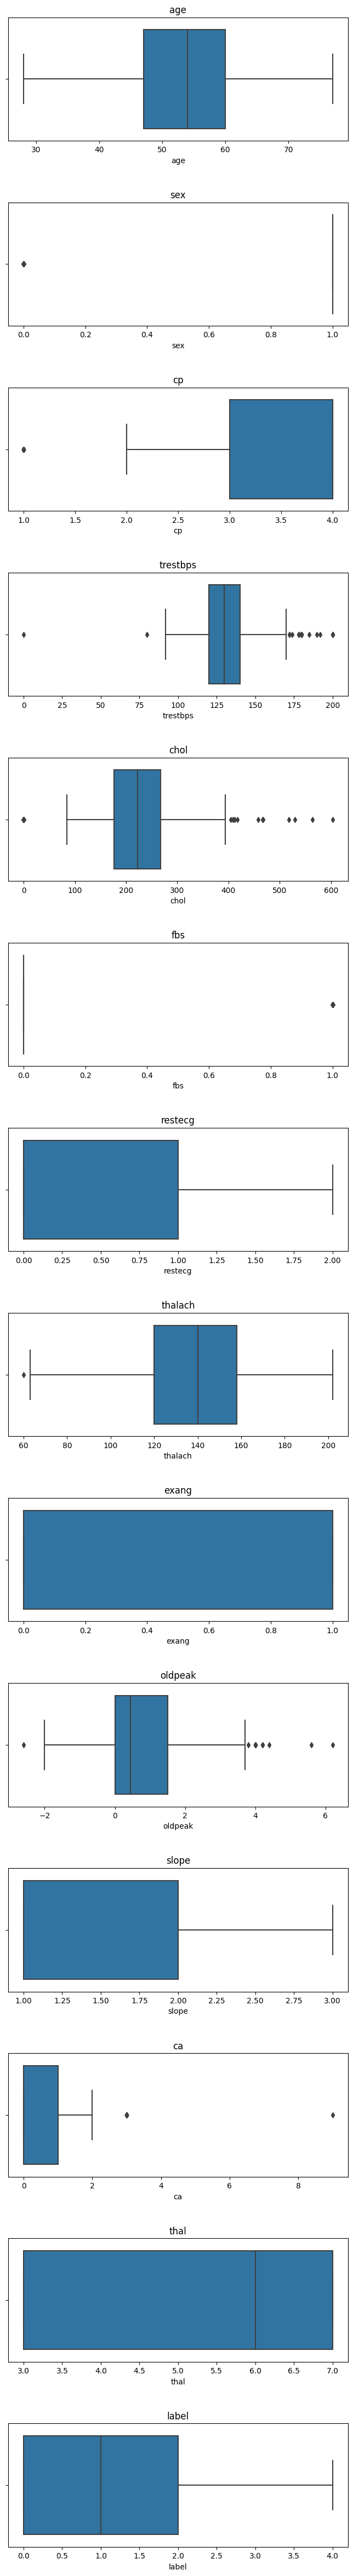

In [1057]:
# Outliers de cada variable en train y validation
cols_num = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','label']
fig, ax = plt.subplots(nrows=14, ncols=1, figsize=(8, 60))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

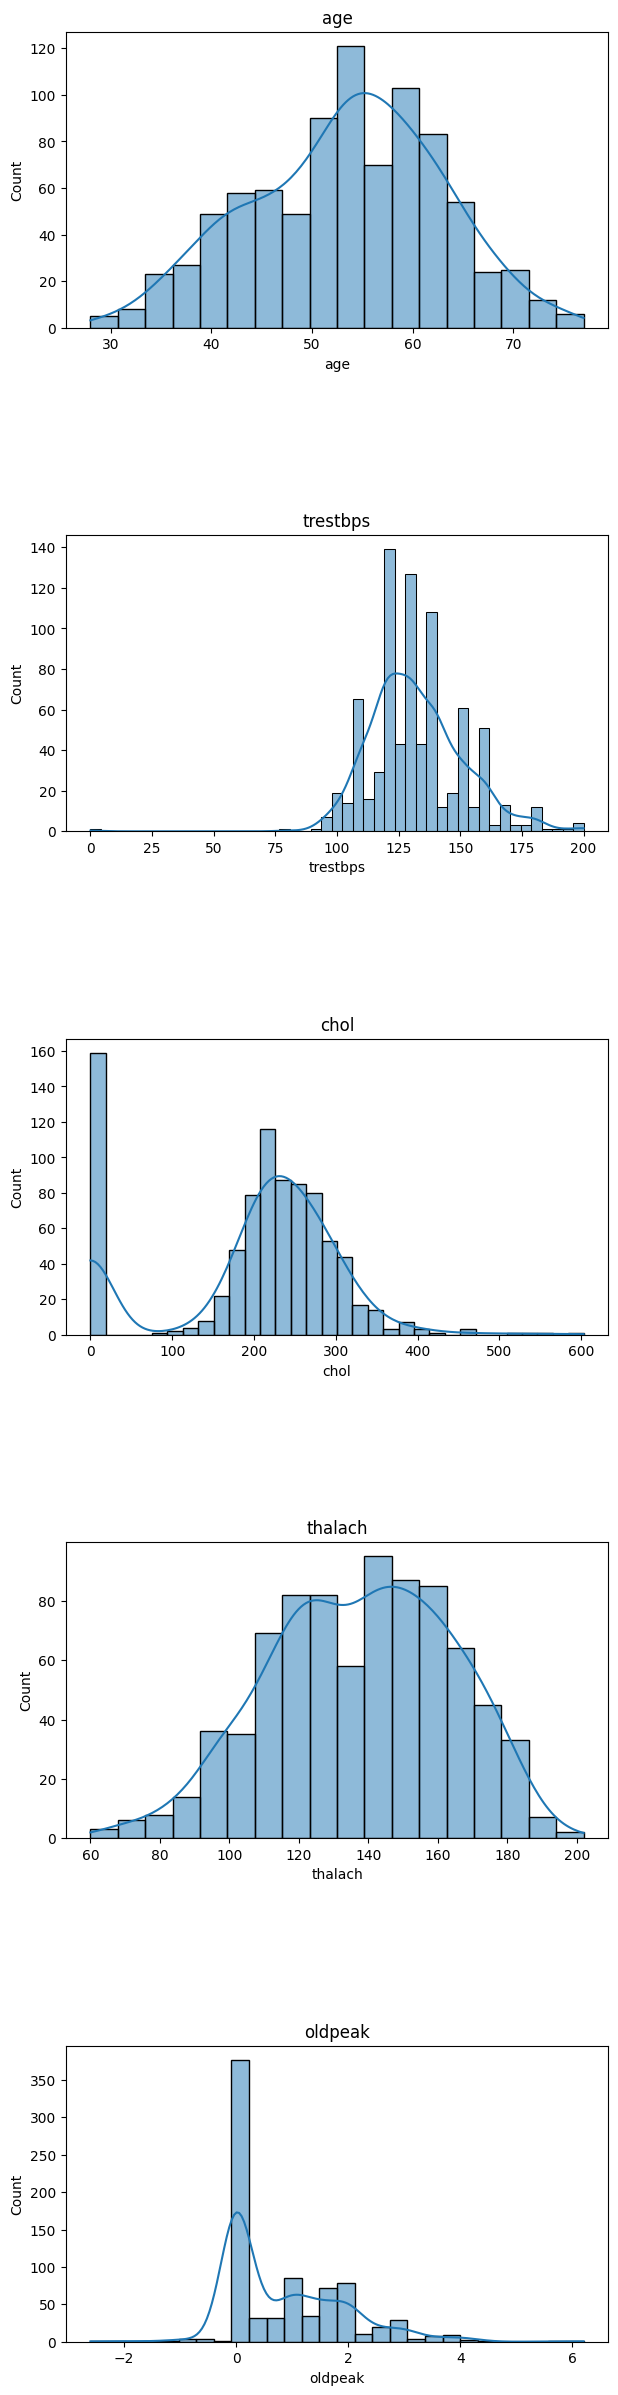

In [1058]:
#Histograma de las variables numéricas
cols_num = ['age','trestbps','chol','thalach','oldpeak']
num_subplots = min(len(cols_num), 14)

fig, ax = plt.subplots(nrows=num_subplots, ncols=1, figsize=(7,30))
fig.subplots_adjust(hspace=0.7)

for i in range(num_subplots):
    col = cols_num[i]
    sns.histplot(x=col, data=df, ax=ax[i], kde=True)
    ax[i].set_title(col)

In [1059]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,866.000000,866.000000,866.000000,809.000000,840.00000,784.000000,865.000000,811.000000,811.000000,806.000000,570.000000,297.000000,413.000000,866.000000
mean,53.436490,0.788684,3.254042,132.092707,199.42381,0.159439,0.603468,137.692972,0.385943,0.846650,1.761404,0.703704,5.050847,1.085450
std,9.471283,0.408478,0.919984,19.129122,109.65967,0.366318,0.805788,26.156664,0.487118,1.071277,0.618336,1.049334,1.925766,1.232356
min,28.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,176.75000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.00000,0.000000,0.000000,140.000000,0.000000,0.450000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.25000,0.000000,1.000000,158.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.00000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,9.000000,7.000000,4.000000


**Outliers o valores extremos :** en las variables trestbps, chol, oldpeak, thalach y ca 

**Valores nulos:** en las variables trestbos, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal.

Chol tiene muchos 0s, no tiene sentido tener colesterol 0.

## Conjunto de Test

In [1060]:
df2 = pd.read_csv('test_dataset.csv')
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,56.0,1.0,2.0,124.0,224.0,1.0,0.0,161.0,0.0,2.0,2.0,NaN,NaN
1,61.0,1.0,4.0,125.0,0.0,0.0,0.0,105.0,1.0,0.0,3.0,NaN,7.0
2,52.0,1.0,4.0,135.0,0.0,NaN,0.0,128.0,1.0,2.0,2.0,NaN,7.0
3,64.0,1.0,4.0,120.0,0.0,1.0,1.0,106.0,0.0,2.0,2.0,NaN,NaN
4,49.0,1.0,1.0,130.0,0.0,0.0,1.0,145.0,0.0,3.0,2.0,NaN,NaN


In [1061]:
#Número de filas y columnas del dataset de test
df2.shape

(50, 13)

In [1062]:
# Contar los valores nulos en cada columna
df2.isnull().sum()

age          0
sex          0
cp           0
trestbps     2
chol         4
fbs          7
restecg      1
thalach      0
exang        0
oldpeak      2
slope       12
ca          38
thal        30
dtype: int64

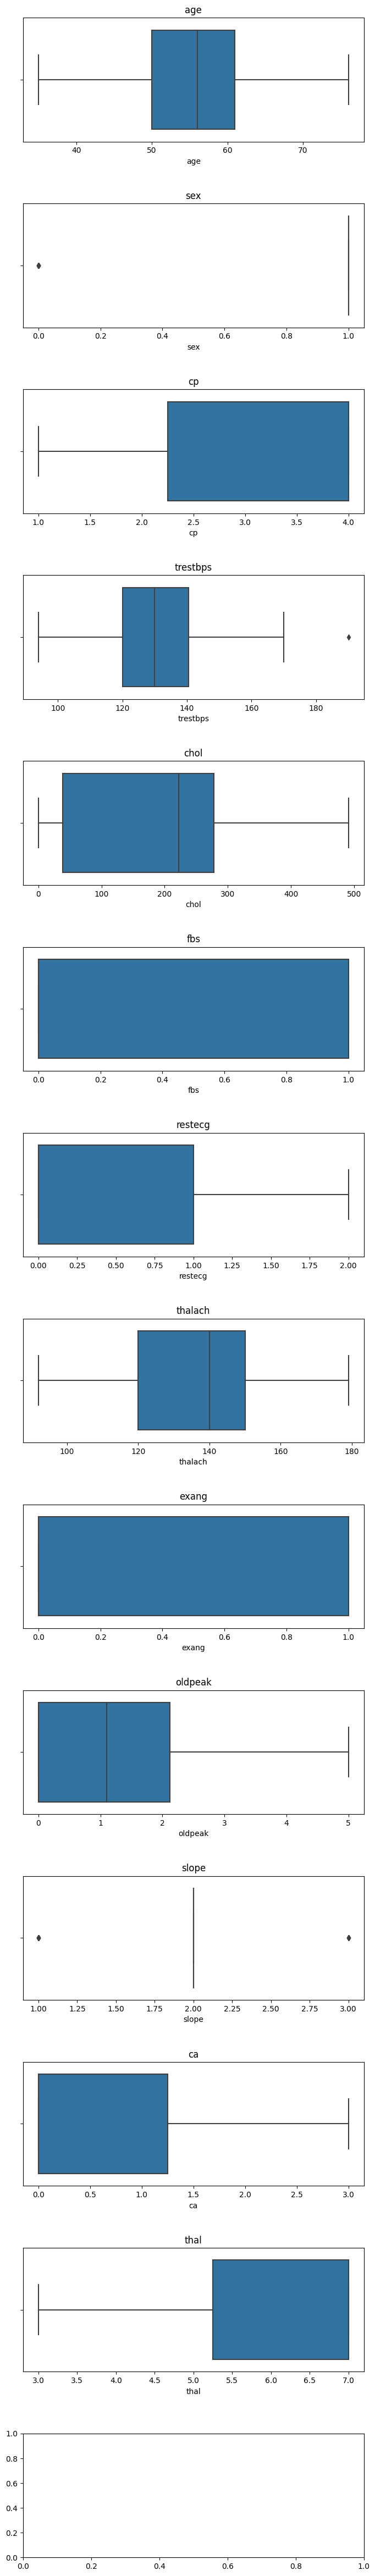

In [1063]:
# Outliers de cada variable en test
cols_num = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
fig, ax = plt.subplots(nrows=14, ncols=1, figsize=(8, 60))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df2, ax=ax[i])
    ax[i].set_title(col)

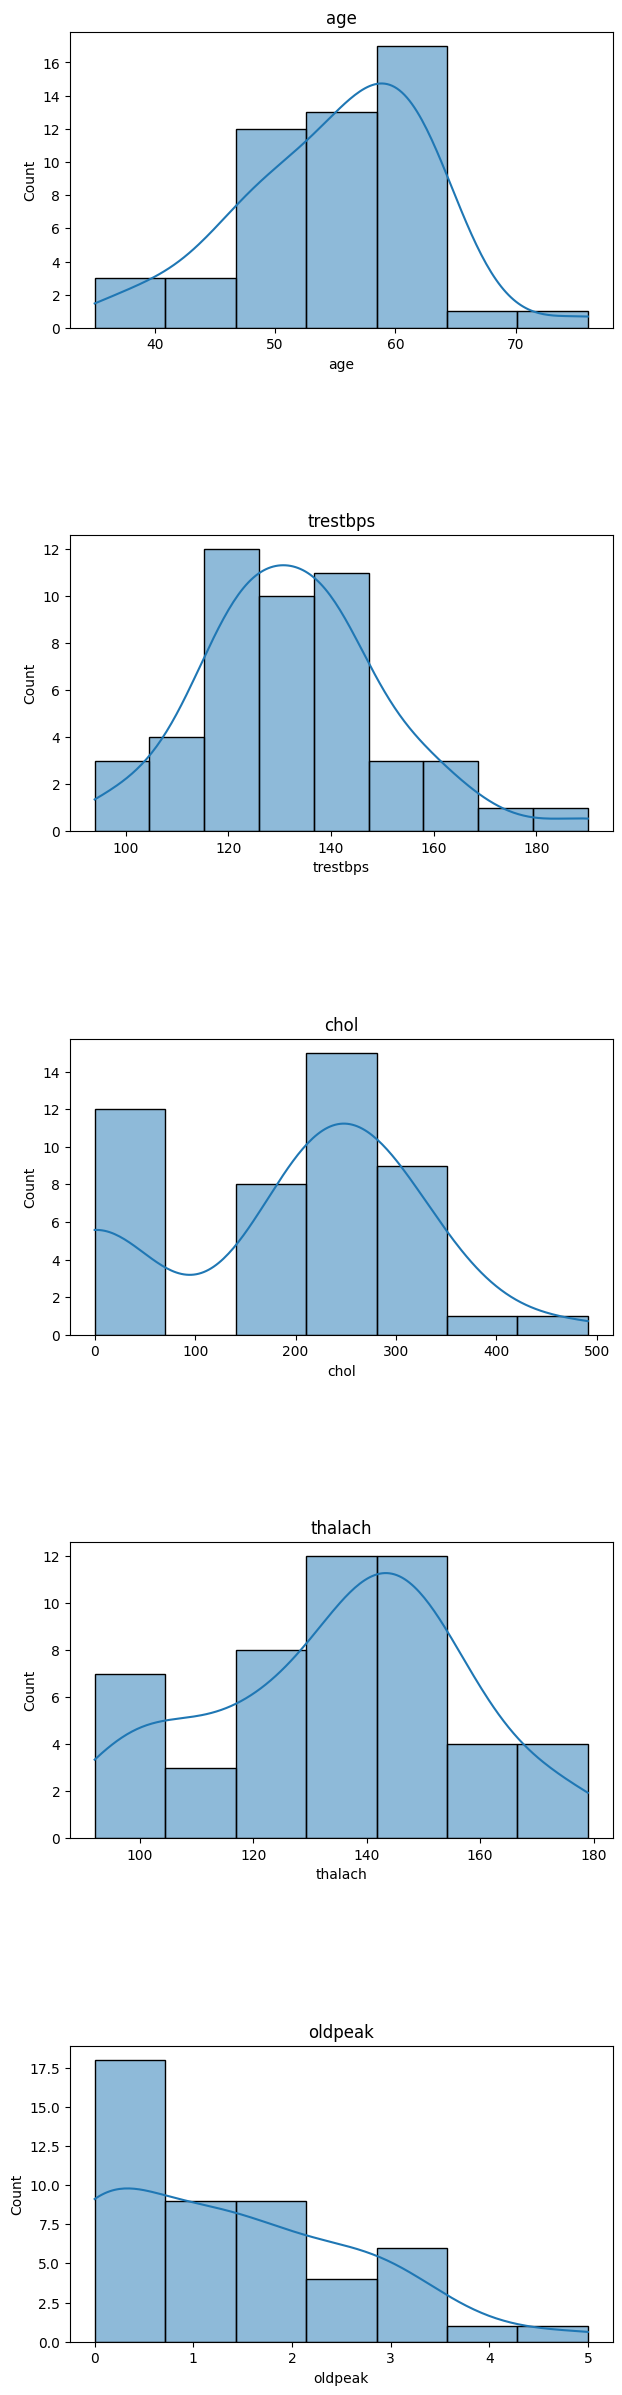

In [1064]:
#Histograma de las variables numéricas
cols_num = ['age','trestbps','chol','thalach','oldpeak']
num_subplots = min(len(cols_num), 14)

fig, ax = plt.subplots(nrows=num_subplots, ncols=1, figsize=(7,30))
fig.subplots_adjust(hspace=0.7)

for i in range(num_subplots):
    col = cols_num[i]
    sns.histplot(x=col, data=df2, ax=ax[i], kde=True)
    ax[i].set_title(col)

In [1065]:
df2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,50.000000,50.000000,50.00000,48.000000,46.000000,43.00000,49.000000,50.00000,50.000000,48.000000,38.000000,12.00000,20.000000
mean,55.120000,0.780000,3.28000,132.979167,194.086957,0.27907,0.612245,134.94000,0.460000,1.366667,1.894737,0.75000,5.800000
std,7.922172,0.418452,1.03095,18.014757,130.567109,0.45385,0.811797,22.18421,0.503457,1.280514,0.605804,1.05529,1.704483
min,35.000000,0.000000,1.00000,94.000000,0.000000,0.00000,0.000000,92.00000,0.000000,0.000000,1.000000,0.00000,3.000000
25%,50.000000,1.000000,2.25000,120.000000,38.250000,0.00000,0.000000,120.00000,0.000000,0.000000,2.000000,0.00000,5.250000
50%,56.000000,1.000000,4.00000,130.000000,222.000000,0.00000,0.000000,140.00000,0.000000,1.100000,2.000000,0.00000,7.000000
75%,61.000000,1.000000,4.00000,140.500000,278.250000,1.00000,1.000000,150.00000,1.000000,2.125000,2.000000,1.25000,7.000000
max,76.000000,1.000000,4.00000,190.000000,491.000000,1.00000,2.000000,179.00000,1.000000,5.000000,3.000000,3.00000,7.000000


 Observamos que Trestbps tiene un **outlier**.
 
 **Tenemos valores nulos:** en trestbps, chol, fbs,restecg, oldpeak, slope, ca, thal.
 
 Chol tiene 0s.

# 2 - Preproceso, limpieza y transformación de los datos

## Conjunto de Train y Validation 

In [1068]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,866.000000,866.000000,866.000000,809.000000,840.000000,784.000000,865.000000,811.000000,811.000000,806.000000,570.000000,297.000000,413.000000,866.000000
mean,53.436490,0.788684,3.254042,132.092707,245.986202,0.159439,0.603468,137.692972,0.385943,0.846650,1.761404,0.703704,5.050847,1.085450
std,9.471283,0.408478,0.919984,19.129122,52.236989,0.366318,0.805788,26.156664,0.487118,1.071277,0.618336,1.049334,1.925766,1.232356
min,28.000000,0.000000,1.000000,0.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,216.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,245.990000,0.000000,0.000000,140.000000,0.000000,0.450000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.250000,0.000000,1.000000,158.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,9.000000,7.000000,4.000000


In [1069]:
#Train y validation
# Identificar las variables categóricas y continuas
# Listamos nuestras variables numéricas y categóricas de test

catest_variables = ['age','sex', 'cp', 'fbs','restecg','exang','slope','ca','thal']
numtest_variables = ['trestbps','chol', 'thalach', 'oldpeak']

# Rellenar los valores faltantes de las variables continuas con la media
df[numtest_variables] = df[numtest_variables].fillna(df[numtest_variables].mean())

# Rellenar los valores faltantes de las variables categóricas con la moda
df[catest_variables] = df[catest_variables].fillna(df[catest_variables].mode().iloc[0])

In [1108]:
#Nos ayuda a encontrar valores 0 en la columna que le indiquemos para poder cambair ese valor si es necesario
if (df['exang'] == 0).any():
    print("La columna contiene valores iguales a cero")
else:
    print("La columna no contiene valores iguales a cero")

La columna no contiene valores iguales a cero


In [1071]:
# Calcular la media de la columna (excluyendo los valores de 0), con 2 decimales
mean_ca = round(df[df['ca'] != 0]['ca'].mean(),2)
print(mean_ca)

1.69


In [1072]:
#reemplaza los valores 0 por la media de la columna calculada anteriormente
df['ca'] = df['ca'].replace(0, mean_ca)

In [1073]:
# Calcular la media de la columna (excluyendo los valores de 0), con 2 decimales
mean_oldpeak = round(df[df['oldpeak'] != 0]['oldpeak'].mean(),2)
print(mean_oldpeak)

1.43


In [1074]:
#reemplaza los valores 0 por la media de la columna calculada anteriormente
df['oldpeak'] = df['oldpeak'].replace(0, mean_oldpeak)

In [1075]:
# Calcular la media de la columna (excluyendo los valores de 0), con 2 decimales
mean_chol = round(df[df['chol'] != 0]['chol'].mean(),2)
print(mean_chol)

245.99


In [1076]:
#reemplaza los valores 0 por la media de la columna calculada anteriormente
df['chol'] = df['chol'].replace(0, mean_chol)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,split
0,56.0,1.0,2.0,126.0,166.00,0.0,1.0,140.0,0.0,1.43,2.0,1.69,3.0,0,val
1,52.0,1.0,3.0,172.0,199.00,1.0,0.0,162.0,0.0,0.50,1.0,1.69,7.0,0,train
2,57.0,1.0,2.0,180.0,285.00,1.0,1.0,120.0,0.0,0.80,2.0,1.69,3.0,1,train
3,66.0,1.0,3.0,110.0,213.00,1.0,2.0,99.0,1.0,1.30,2.0,1.69,3.0,0,train
4,67.0,1.0,3.0,152.0,212.00,0.0,2.0,150.0,0.0,0.80,2.0,1.69,7.0,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,62.0,1.0,2.0,120.0,281.00,0.0,2.0,103.0,0.0,1.40,2.0,1.00,7.0,3,val
862,74.0,1.0,4.0,155.0,310.00,0.0,0.0,112.0,1.0,1.50,3.0,1.69,3.0,2,train
863,60.0,1.0,4.0,130.0,253.00,0.0,0.0,144.0,1.0,1.40,1.0,1.00,7.0,1,train
864,62.0,0.0,4.0,140.0,268.00,0.0,2.0,160.0,0.0,3.60,3.0,2.00,3.0,3,train


In [1077]:
#Muestra los valores nulos
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
split       0
dtype: int64

In [1078]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.00000,866.000000
mean,53.436490,0.788684,3.254042,132.092707,245.986202,0.144342,0.602771,137.692972,0.361432,1.432851,1.842956,1.689353,3.97806,1.085450
std,9.471283,0.408478,0.919984,18.488117,51.445935,0.351639,0.805583,25.311437,0.480693,0.754636,0.514126,0.373603,1.67835,1.232356
min,28.000000,0.000000,1.000000,0.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,1.000000,3.00000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,216.250000,0.000000,0.000000,120.000000,0.000000,1.000000,2.000000,1.690000,3.00000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,245.990000,0.000000,0.000000,137.692972,0.000000,1.430000,2.000000,1.690000,3.00000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,266.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.690000,6.00000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,9.000000,7.00000,4.000000


In [1079]:
import pandas as pd
#Detectamos outliers y los remplazamos por la media de la columna
# Seleccionar las columnas de interés
columnas = ['trestbps','chol', 'thalach', 'oldpeak']
datos = df[columnas]

# Calcular la media y el desvío estándar para cada columna
medias = datos.mean()
desvios = datos.std()

# Establecer los umbrales para identificar outliers para cada columna
umbral_inferior = medias - 3 * desvios
umbral_superior = medias + 3 * desvios

# Reemplazar los outliers de cada columna por la media de la columna correspondiente
for col in columnas:
    df.loc[datos[col] < umbral_inferior[col], col] = medias[col]
    df.loc[datos[col] > umbral_superior[col], col] = medias[col]

# Imprimir el dataset sin outliers
print(df)



      age  sex   cp  trestbps    chol  fbs  restecg  thalach  exang  oldpeak  \
0    56.0  1.0  2.0     126.0  166.00  0.0      1.0    140.0    0.0     1.43   
1    52.0  1.0  3.0     172.0  199.00  1.0      0.0    162.0    0.0     0.50   
2    57.0  1.0  2.0     180.0  285.00  1.0      1.0    120.0    0.0     0.80   
3    66.0  1.0  3.0     110.0  213.00  1.0      2.0     99.0    1.0     1.30   
4    67.0  1.0  3.0     152.0  212.00  0.0      2.0    150.0    0.0     0.80   
..    ...  ...  ...       ...     ...  ...      ...      ...    ...      ...   
861  62.0  1.0  2.0     120.0  281.00  0.0      2.0    103.0    0.0     1.40   
862  74.0  1.0  4.0     155.0  310.00  0.0      0.0    112.0    1.0     1.50   
863  60.0  1.0  4.0     130.0  253.00  0.0      0.0    144.0    1.0     1.40   
864  62.0  0.0  4.0     140.0  268.00  0.0      2.0    160.0    0.0     3.60   
865  57.0  1.0  4.0     110.0  245.99  0.0      1.0    131.0    1.0     1.40   

     slope    ca  thal  label  split  


In [1080]:
#indica número de filas y columnas
df.shape

(866, 15)

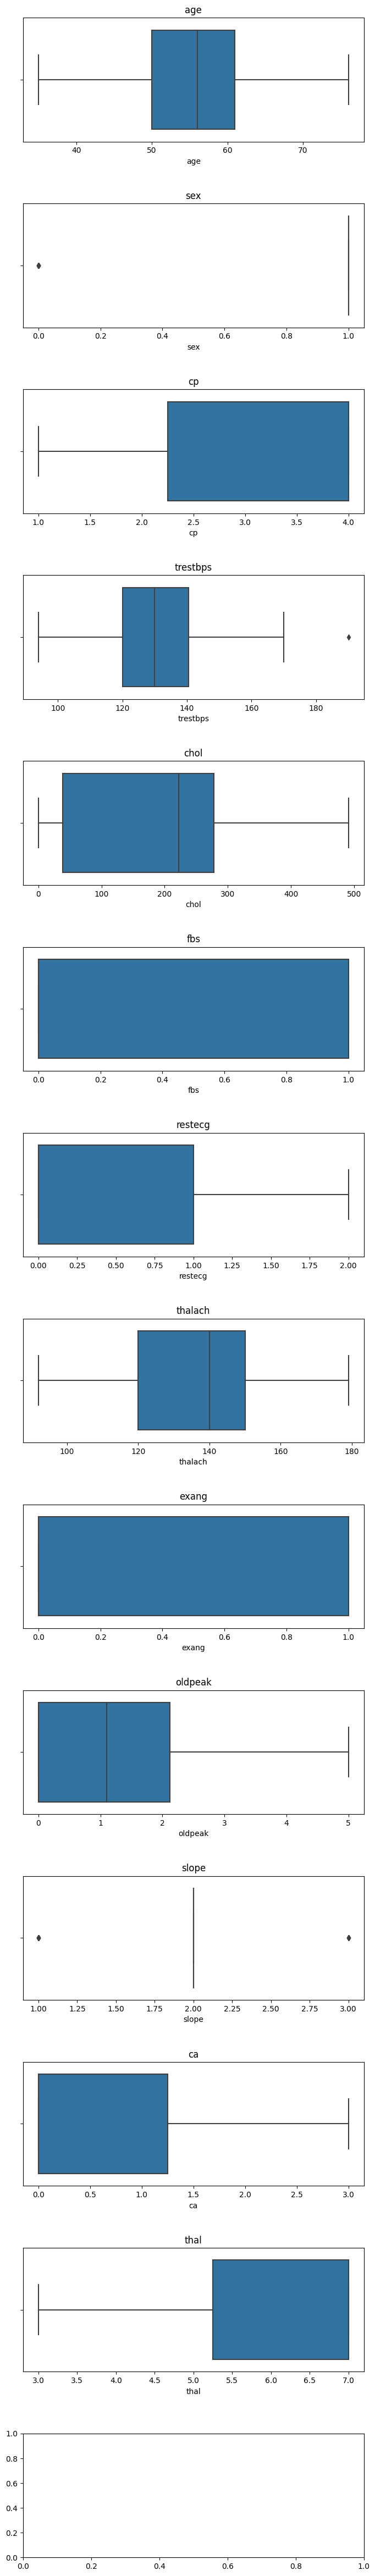

In [1081]:
# Outliers de cada variable en test
cols_num = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
fig, ax = plt.subplots(nrows=14, ncols=1, figsize=(8, 60))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df2, ax=ax[i])
    ax[i].set_title(col)

In [1082]:
# Observamos las filas duplicadas del conjunto de train
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"El conjunto de datos tiene {num_duplicates} filas duplicadas.")

El conjunto de datos tiene 1 filas duplicadas.


## Conjunto de Test

In [1083]:
#Test
# Identificar las variables categóricas y continuas
# Listamos nuestras variables numéricas y categóricas de test

catest_variables1 = ['age','sex', 'cp', 'fbs','restecg','exang','slope','ca','thal']
numtest_variables1 = ['trestbps','chol', 'thalach', 'oldpeak']

# Rellenar los valores faltantes de las variables continuas con la media
df2[numtest_variables1] = df2[numtest_variables1].fillna(df2[numtest_variables1].mean())

# Rellenar los valores faltantes de las variables categóricas con la moda
df2[catest_variables1] = df2[catest_variables1].fillna(df2[catest_variables1].mode().iloc[0])

In [1084]:
#Nos ayuda a encontrar valores 0 en la columna que le indiquemos para poder cambair ese valor si es necesario
if (df2['ca'] == 0).any():
    print("La columna contiene valores iguales a cero")
else:
    print("La columna no contiene valores iguales a cero")

La columna contiene valores iguales a cero


In [1085]:
# Calcular la media de la columna (excluyendo los valores de 0), con 2 decimales
mean_trestbps = round(df[df['trestbps'] != 0]['trestbps'].mean(),2)
print(mean_trestbps)

131.8


In [1086]:
#reemplaza los valores 0 por la media de la columna calculada anteriormente
df2['trestbps'] = df2['trestbps'].replace(0, mean_trestbps)

In [1087]:
# Calcular la media de la columna(excluyendo los valores de 0), con 2 decimales
mean_chol = round(df[df['chol'] != 0]['chol'].mean(),2)
print(mean_chol)

243.24


In [1088]:
#reemplaza los valores 0 por la media de la columna calculada anteriormente
df2['chol'] = df2['chol'].replace(0, mean_trestbps)

In [1089]:
# Calcular la media de la columna(excluyendo los valores de 0), con 2 decimales
mean_fbs = round(df[df['fbs'] != 0]['fbs'].mean(),2)
print(mean_fbs)

1.0


In [1090]:
#reemplaza los valores 0 por la media de la columna calculada anteriormente
df2['fbs'] = df2['fbs'].replace(0, mean_fbs)

In [1091]:
#Valores nullos
df2.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [1092]:
import pandas as pd

# Seleccionar las columnas de interés
columnas = ['trestbps','chol', 'thalach', 'oldpeak']
datos = df2[columnas]

# Calcular la media y el desvío estándar para cada columna
medias = datos.mean()
desvios = datos.std()

# Establecer los umbrales para identificar outliers para cada columna
umbral_inferior = medias - 3 * desvios
umbral_superior = medias + 3 * desvios

# Reemplazar los outliers de cada columna por la media de la columna correspondiente
for col in columnas:
    df2.loc[datos[col] < umbral_inferior[col], col] = medias[col]
    df2.loc[datos[col] > umbral_superior[col], col] = medias[col]

# Imprimir el dataset sin outliers
print(df2)



     age  sex   cp    trestbps        chol  fbs  restecg  thalach  exang  \
0   56.0  1.0  2.0  124.000000  224.000000  1.0      0.0    161.0    0.0   
1   61.0  1.0  4.0  125.000000  131.800000  1.0      0.0    105.0    1.0   
2   52.0  1.0  4.0  135.000000  131.800000  1.0      0.0    128.0    1.0   
3   64.0  1.0  4.0  120.000000  131.800000  1.0      1.0    106.0    0.0   
4   49.0  1.0  1.0  130.000000  131.800000  1.0      1.0    145.0    0.0   
5   58.0  0.0  4.0  170.000000  225.000000  1.0      2.0    146.0    1.0   
6   63.0  0.0  4.0  150.000000  407.000000  1.0      2.0    154.0    0.0   
7   62.0  1.0  4.0  132.979167  170.000000  1.0      1.0    120.0    1.0   
8   57.0  1.0  4.0  144.000000  270.000000  1.0      1.0    160.0    1.0   
9   43.0  1.0  4.0  140.000000  131.800000  1.0      1.0    140.0    1.0   
10  61.0  0.0  4.0  130.000000  294.000000  1.0      1.0    120.0    1.0   
11  61.0  1.0  3.0  120.000000  337.000000  1.0      0.0     98.0    1.0   
12  62.0  1.

In [1093]:
#indica cuantas filas y cuantas columnas tiene el dataset
df2.shape

(50, 13)

In [1094]:
# Observamos si el conjunto tiene filas duplicadas
duplicates1 = df2.duplicated()
num_duplicates1 = duplicates1.sum()
print(f"El conjunto de datos tiene {num_duplicates1} filas duplicadas.")

El conjunto de datos tiene 0 filas duplicadas.


# 3 - Modelo Random Forest 

In [1095]:
# Probamos distintas maneras de coger datos del dataset
# Agrupar el conjunto de datos por la columna de label
#df_agr = df.groupby('label')

# Definir una función que devuelva las 33 primeras filas de cada grupo
#def get_first_n_rows(group, n=370):
    #return group.head(n)

# Aplicar la función a cada grupo y combinar los resultados
#df_agr = df_agr.apply(get_first_n_rows)
#df_agr

In [1096]:
import random
# Definir una función que devuelva n filas aleatorias de cada grupo
def get_random_n_rows(group, n=570):
    # Obtener el número de filas en el grupo
    num_rows = len(group)
    # Seleccionar un número de filas aleatorias que sea menor o igual a num_rows
    n = min(n, num_rows)
    # Seleccionar n índices de fila al azar del grupo
    indices = random.sample(list(group.index), n)
    # Devolver las filas correspondientes a los índices seleccionados
    return group.loc[indices]

# Aplicar la función a cada grupo y combinar los resultados
df_agr = df.groupby('label').apply(get_random_n_rows)


In [1097]:
df_train= df_agr.copy()

In [1098]:
df_test= df2.copy()

In [1099]:
# Agrupamos las variables categóricas y las numéricas
catest_variables = df2.columns.values[df2.dtypes == 'object'].tolist()
numtest_variables = df2.columns.values[df2.dtypes == 'float64'].tolist()

In [1100]:
# Borramos en el conjunto de train la columna label
X = df_train.drop('label', axis=1).copy()
X.head()

age  sex   cp    trestbps   chol  fbs  restecg     thalach  exang  \
label                                                                           
0     581  60.0  1.0  4.0  132.092707  195.0  0.0      0.0  137.692972    0.0   
      597  43.0  0.0  2.0  120.000000  201.0  0.0      0.0  165.000000    0.0   
      26   51.0  0.0  3.0  130.000000  256.0  0.0      2.0  149.000000    0.0   
      547  65.0  1.0  1.0  132.092707  252.0  0.0      0.0  137.692972    0.0   
      563  37.0  1.0  2.0  130.000000  283.0  0.0      1.0   98.000000    0.0   

           oldpeak  slope    ca  thal  split  
label                                         
0     581  0.84665    2.0  1.69   3.0  train  
      597  1.43000    2.0  1.69   3.0  train  
      26   0.50000    1.0  1.69   3.0  train  
      547  0.84665    2.0  1.69   3.0  train  
      563  1.43000    2.0  1.69   3.0  train

In [1101]:
#Partimos el dataset df en conjunto de train y val segun su valor en la columna split
df_val = df_train.groupby('split').get_group('val')

In [1102]:
#Partimos el dataset df en conjunto de train y val segun su valor en la columna split
df_train = df_train.groupby('split').get_group('train')

In [1103]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
#Valora las correlaciones de las variables en nuestro modelo y las lanza según su correlación
# Separar las variables predictoras y la variable objetivo
X_train = df_train[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
              'thalach', 'exang', 'oldpeak', 'slope','ca','thal']]
y_train = df_train['label']

# Crear una instancia del modelo de Random Forest y ajustarlo a los datos de entrenamiento
model = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=50)
model.fit(X_train, y_train)

# Obtener la importancia de las características
importances = model.feature_importances_

# Imprimir las características en orden descendente de importancia
indices = importances.argsort()[::-1]
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

1. thalach (0.144390)
2. age (0.142981)
3. chol (0.132338)
4. oldpeak (0.111307)
5. trestbps (0.110408)
6. cp (0.087806)
7. exang (0.056821)
8. thal (0.047479)
9. restecg (0.045342)
10. ca (0.033020)
11. slope (0.032691)
12. sex (0.032100)
13. fbs (0.023317)


In [1104]:
X = df_train.select_dtypes(include=['int64', 'float64'])
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn import *
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, df_train['label'], test_size=0.3, random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Aplicar combinación de submuestreo y sobremuestreo con SMOTEENN al conjunto de entrenamiento
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_resampled, y_resampled)

# Aplicar submuestreo aleatorio al conjunto de entrenamiento equilibrado
#rus = RandomUnderSampler(random_state=42)
#X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

# Crear una instancia del modelo y ajustarlo al conjunto de entrenamiento equilibrado
model = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=40)
model.fit(X_resampled, y_resampled)

# Realizar la predicción utilizando el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo utilizando diferentes métricas de rendimiento
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Exactitud:", accuracy_score(y_test, y_pred))
print("Precisión:", precision_score(y_test, y_pred, average='macro'))
print("F1-score:", f1_score(y_test, y_pred, average='macro'))

Exactitud: 0.8605769230769231
Precisión: 0.8864874141876431
F1-score: 0.8930423724008328


In [1105]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn import metrics
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Quitamos la columna "ca" por que era la variable con más valores NaN:
# Separar las variables predictoras y la variable objetivo del conjunto de entrenamiento
X_train = df_train[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
              'thalach', 'exang', 'oldpeak', 'slope','thal']]
y_train = df_train['label']

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Aplicar combinación de submuestreo y sobremuestreo con SMOTEENN al conjunto de entrenamiento
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_resampled, y_resampled)

# Aplicar submuestreo aleatorio al conjunto de entrenamiento equilibrado
#rus = RandomUnderSampler(random_state=42)
#X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

# Crear una instancia del modelo y ajustarlo al conjunto de entrenamiento equilibrado
model = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=50)
model.fit(X_resampled, y_resampled)

# Seleccionar las columnas de características del conjunto de datos de prueba
X_test = df_test[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
              'thalach', 'exang', 'oldpeak', 'slope','thal']]

# Hacer la predicción en el conjunto de datos de prueba
y_pred_test = model.predict(X_test)

# Evaluar el modelo utilizando diferentes métricas de rendimiento
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Exactitud:", accuracy_score(y_test, y_pred))
print("Precisión:", precision_score(y_test, y_pred, average='macro'))
print("F1-score:", f1_score(y_test, y_pred, average='macro'))



Exactitud: 0.8605769230769231
Precisión: 0.8864874141876431
F1-score: 0.8930423724008328


# 4 - Resultados

In [1106]:
# generar predicciones para el test dataset 
y_pred_test = model.predict(X_test)

# crear un dataframe con los índices de cada fila y las predicciones
pred_df = pd.DataFrame({'ID': X_test.index.values, 'label': y_pred_test.astype(int)})

# exportar a CSV
pred_df.to_csv('resultados.csv', index=False)

In [1107]:
df_resultados = pd.read_csv('/content/resultados.csv')
df_resultados

,ID,label
0,0,0
1,1,3
2,2,3
3,3,2
4,4,3
5,5,3
6,6,3
7,7,4
8,8,3
9,9,3
